<a href="https://colab.research.google.com/github/Nasu43/vlink/blob/main/Final_fakenews_comapre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')

from keras.layers import Dropout, Dense, GRU, Embedding
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
#read data
fake_df = pd.read_csv('/content/Fake.csv')
real_df = pd.read_csv('/content//True.csv')



In [10]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [13]:
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [16]:
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

KeyError: ignored

In [17]:
fake_df['class'] = 0
real_df['class'] = 1

Text(0, 0.5, 'Proportion of News Articles')

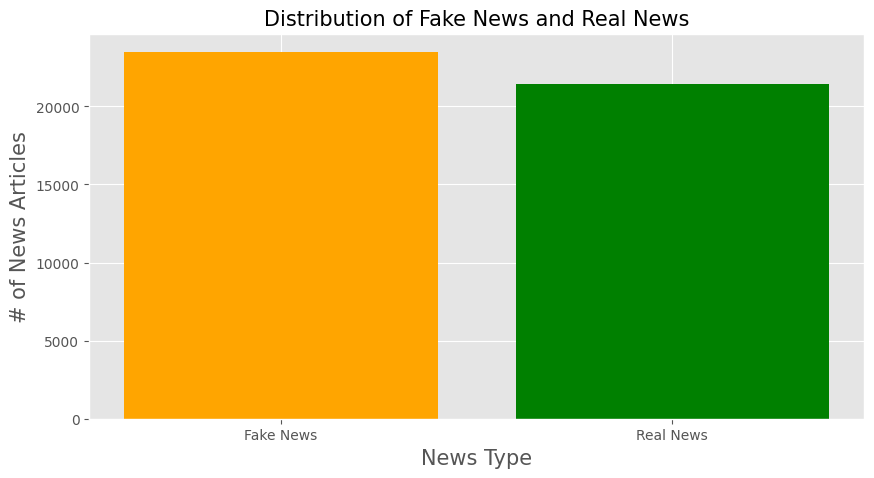

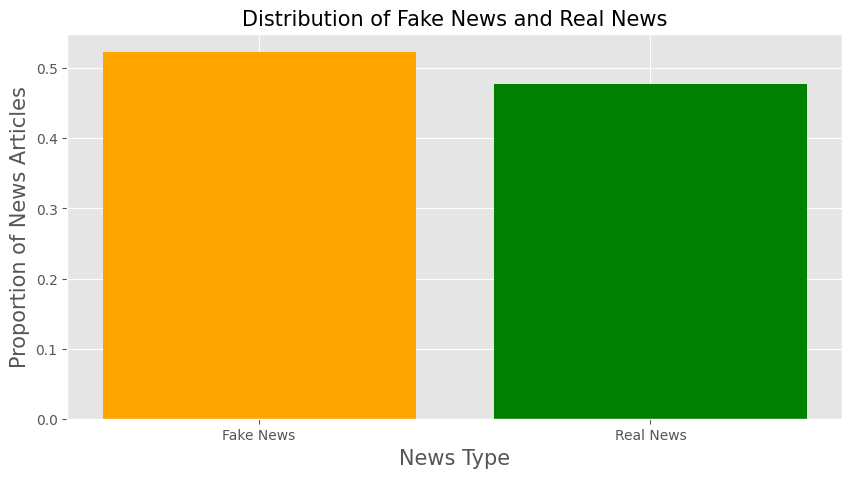

In [18]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)


total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [19]:
print('Difference in news articles:',len(fake_df)-len(real_df))

Difference in news articles: 2064


In [20]:
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [21]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [22]:
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [23]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [24]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [25]:
# tokenize the text into vectors
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [26]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [27]:
from keras.layers import Dropout, Dense,Input,Embedding,Flatten, MaxPooling1D, Conv1D
from keras import layers
vocab_size = 10000
embedding_dim=16
maxlen = 256
trunc_type= 'post'
oov_tok=""

# Buliding and Training of LSTM Model

In [ ]:
# Two bidirectional LSTM layers
# Note that if you want to connect one LSTM to another, you have to pass return_sequences=True
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen),
    #tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
#num_epochs = 10
#history_bi = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

model.save('lstm_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 256, 256)         148480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 386,689
Trainable params: 386,689
Non-trai

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1078/1078 [==============================] - 1094s 1s/step - loss: 0.2419 - accuracy: 0.8880 - val_loss: 0.0783 - val_accuracy: 0.9755
Epoch 2/10
1078/1078 [==============================] - 1060s 984ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 3/10
1078/1078 [==============================] - 1080s 1s/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0325 - val_accuracy: 0.9914
Epoch 4/10
1078/1078 [==============================] - 1070s 993ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0319 - val_accuracy: 0.9916
Epoch 5/10
1078/1078 [==============================] - 1065s 988ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0355 - val_accuracy: 0.9916
Epoch 6/10
1078/1078 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9979

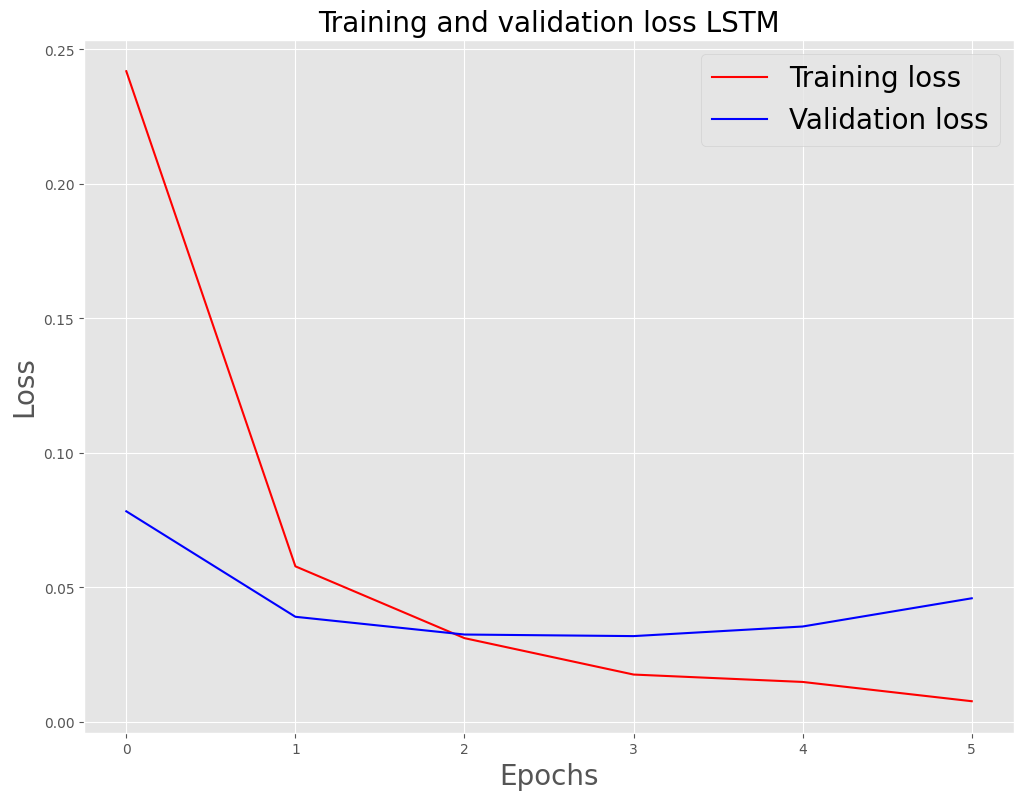

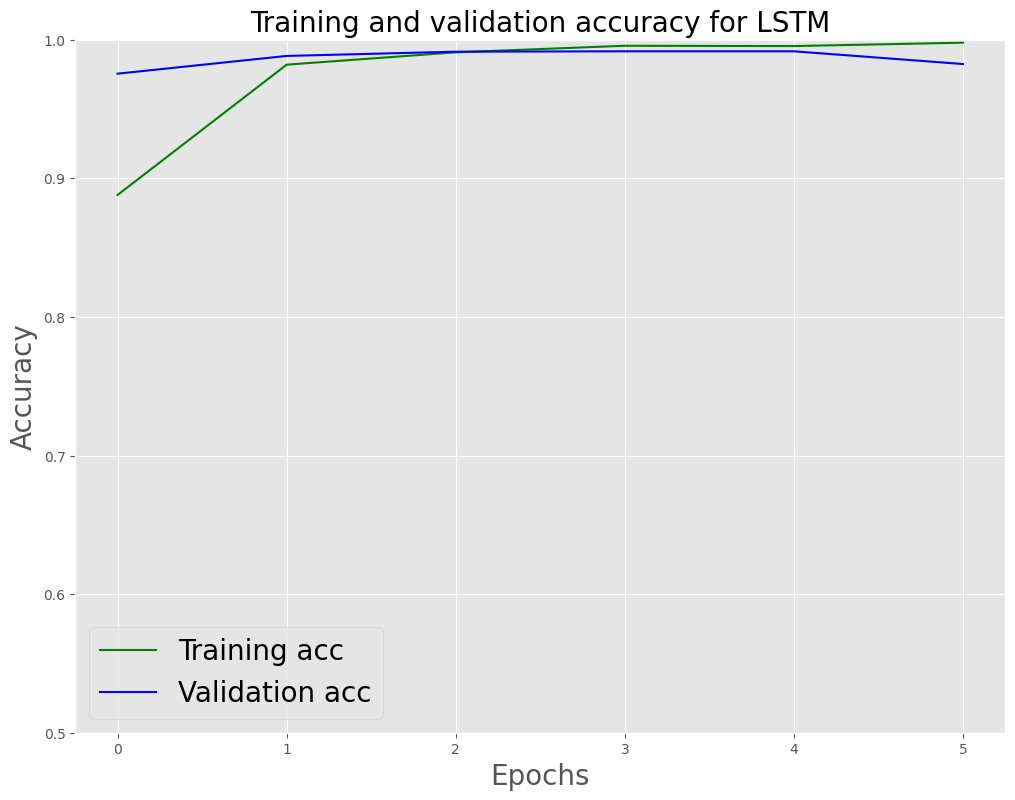

In [39]:
history_dict = history.history

lstm_acc = history_dict['accuracy']
lstm_val_acc = history_dict['val_accuracy']
lstm_loss = history_dict['loss']
lstm_val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, lstm_loss, 'r', label='Training loss')
plt.plot(epochs, lstm_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss LSTM', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, lstm_acc, 'g', label='Training acc')
plt.plot(epochs, lstm_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [40]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 78s 276ms/step - loss: 0.0407 - accuracy: 0.9889


[0.04074389114975929, 0.9888641238212585]

In [41]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

281/281 [==============================] - 76s 271ms/step


In [42]:
acc_lstm = accuracy_score(binary_predictions, y_test)
pre_lstm = precision_score(binary_predictions, y_test)
rec_lstm = recall_score(binary_predictions, y_test)

print('Accuracy on testing set:', acc_lstm )
print('Precision on testing set:',pre_lstm )
print('Recall on testing set:',rec_lstm )


Accuracy on testing set: 0.9888641425389755
Precision on testing set: 0.991894395553497
Recall on testing set: 0.985050597976081


In [43]:
lstm_model_eva = [ acc_lstm, pre_lstm, rec_lstm ]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

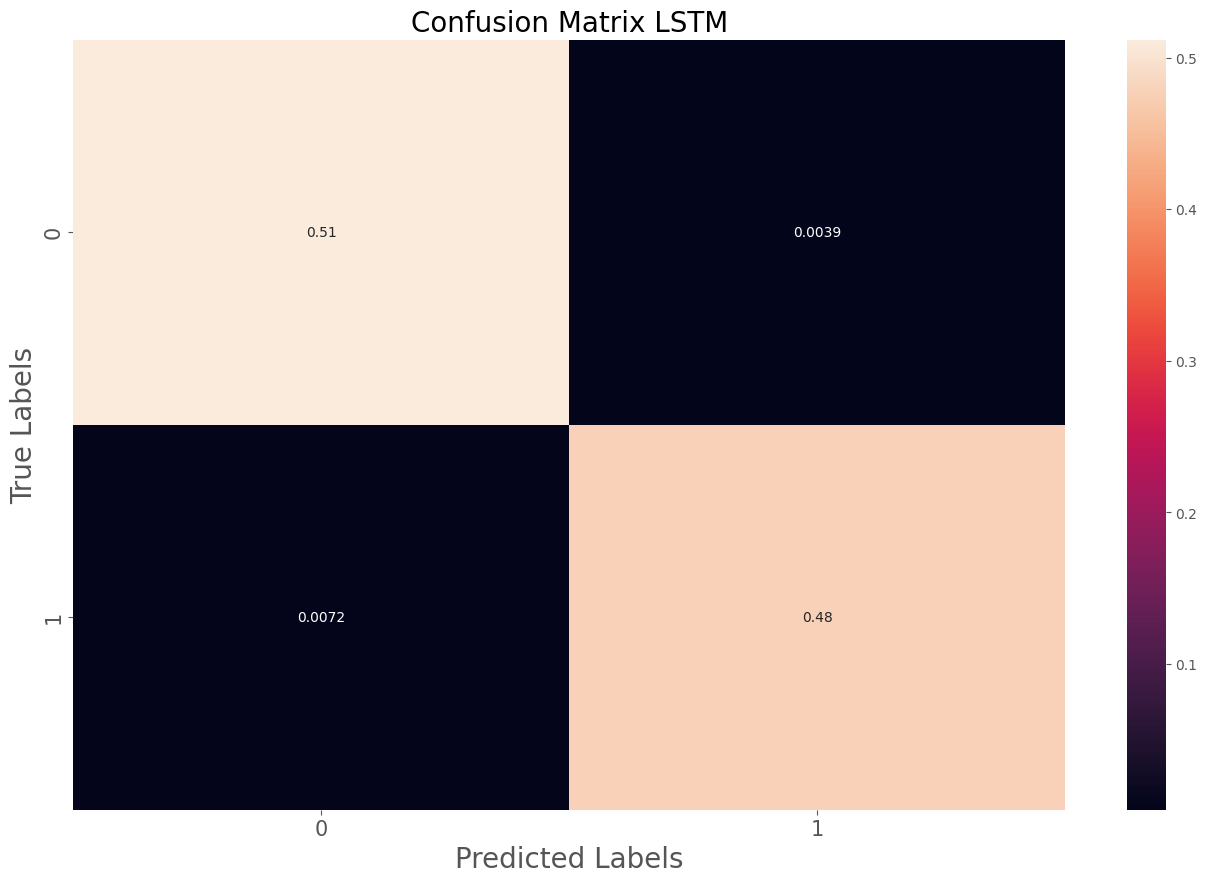

In [44]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix LSTM', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# Building and Training of RNN Model

In [45]:
#using RNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
#num_epochs = 10
#history_bi = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

model.save('rnn_model.h5')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5184      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 165,581
Trainable params: 165,581
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1078/1078 [==============================] - 86s 78ms/step - loss: 0.5849 - accuracy: 0.6738 - val_loss: 0.4089 - val_accuracy: 0.8346
Epoch 2/10
1078/1078 [==============================] - 84s 78ms/step - loss: 0.3434 - accuracy: 0.8560 - val_loss: 0.2182 - val_accuracy: 0.9315
Epoch 3/10
1078/1078 [==============================] - 82s 76ms/step - loss: 0.1490 - accuracy: 0.9522 - val_loss: 0.1105 - val_accuracy: 0.9607
Epoch 4/10
1078/1078 [==============================] - 89s 83ms/step - loss: 0.0773 - accuracy: 0.9757 - val_loss: 0.0620 - val_accuracy: 0.9822
Epoch 5/10
1078/1078 [==============================] - 82s 76ms/step - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0581 - val_accuracy: 0.9808
Epoch 6/10
1078/1078 [==============================] - 84s 78ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 7/10
1078/1078 [==============================] - 85s 79ms/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 0.0435 - val_accura

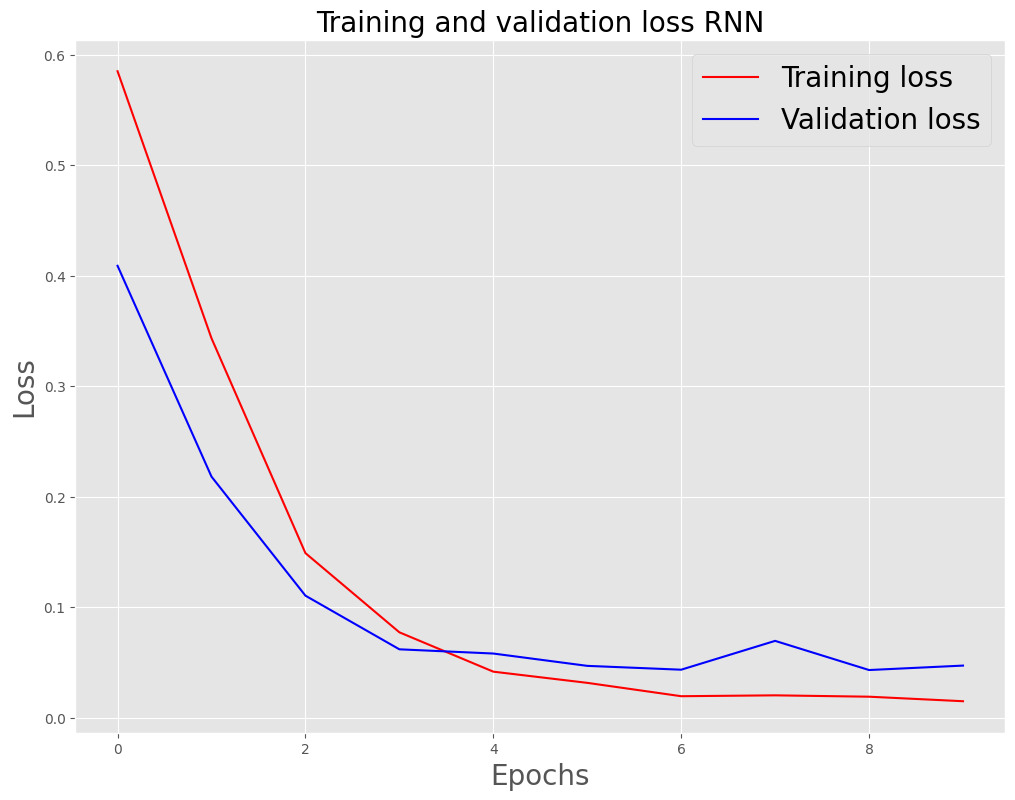

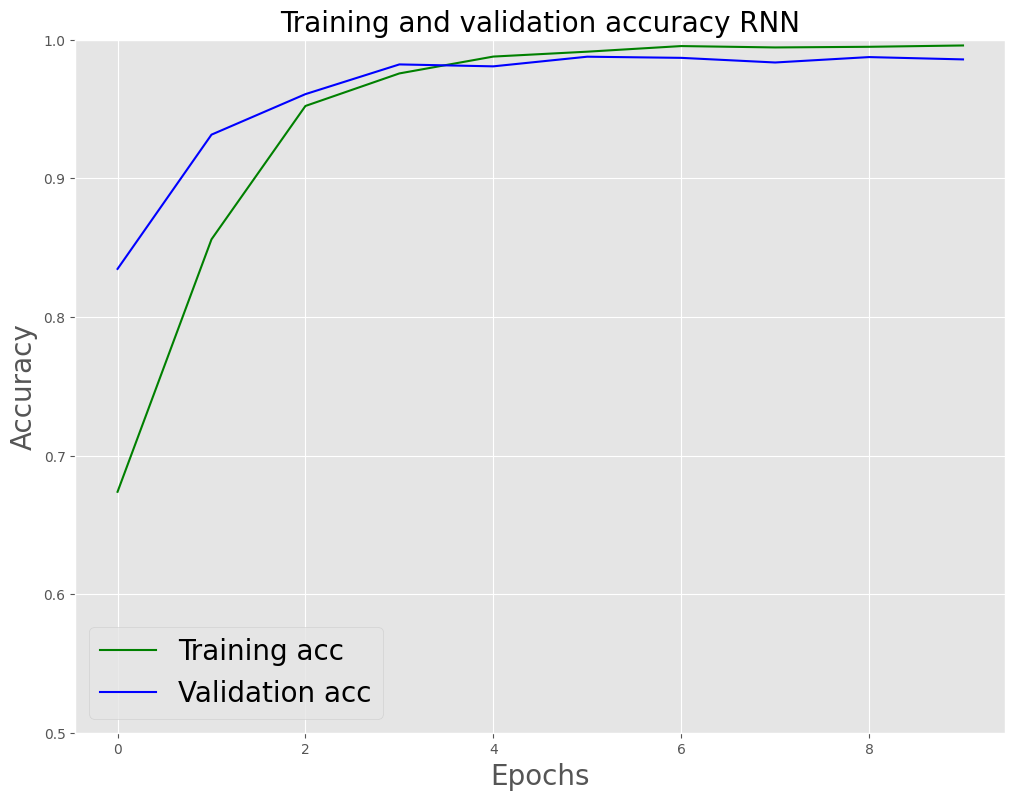

In [47]:
history_dict = history.history
rnn_acc = history_dict['accuracy']
rnn_val_acc = history_dict['val_accuracy']
rnn_loss = history_dict['loss']
rnn_val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, rnn_loss, 'r', label='Training loss')
plt.plot(epochs, rnn_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss RNN', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, rnn_acc, 'g', label='Training acc')
plt.plot(epochs, rnn_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy RNN', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [48]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 6s 21ms/step - loss: 0.0464 - accuracy: 0.9865


[0.04638150706887245, 0.9865255951881409]

In [49]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

281/281 [==============================] - 5s 16ms/step


In [50]:
acc_rnn = accuracy_score(binary_predictions, y_test)
pre_rnn = precision_score(binary_predictions, y_test)
rec_rnn = recall_score(binary_predictions, y_test)

print('Accuracy on testing set:', acc_rnn )
print('Precision on testing set:',pre_rnn )
print('Recall on testing set:',rec_rnn )

Accuracy on testing set: 0.9865256124721603
Precision on testing set: 0.9814729041222788
Recall on testing set: 0.9904183220378593


In [51]:
rnn_model_eva = [ acc_rnn, pre_rnn, rec_rnn ]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

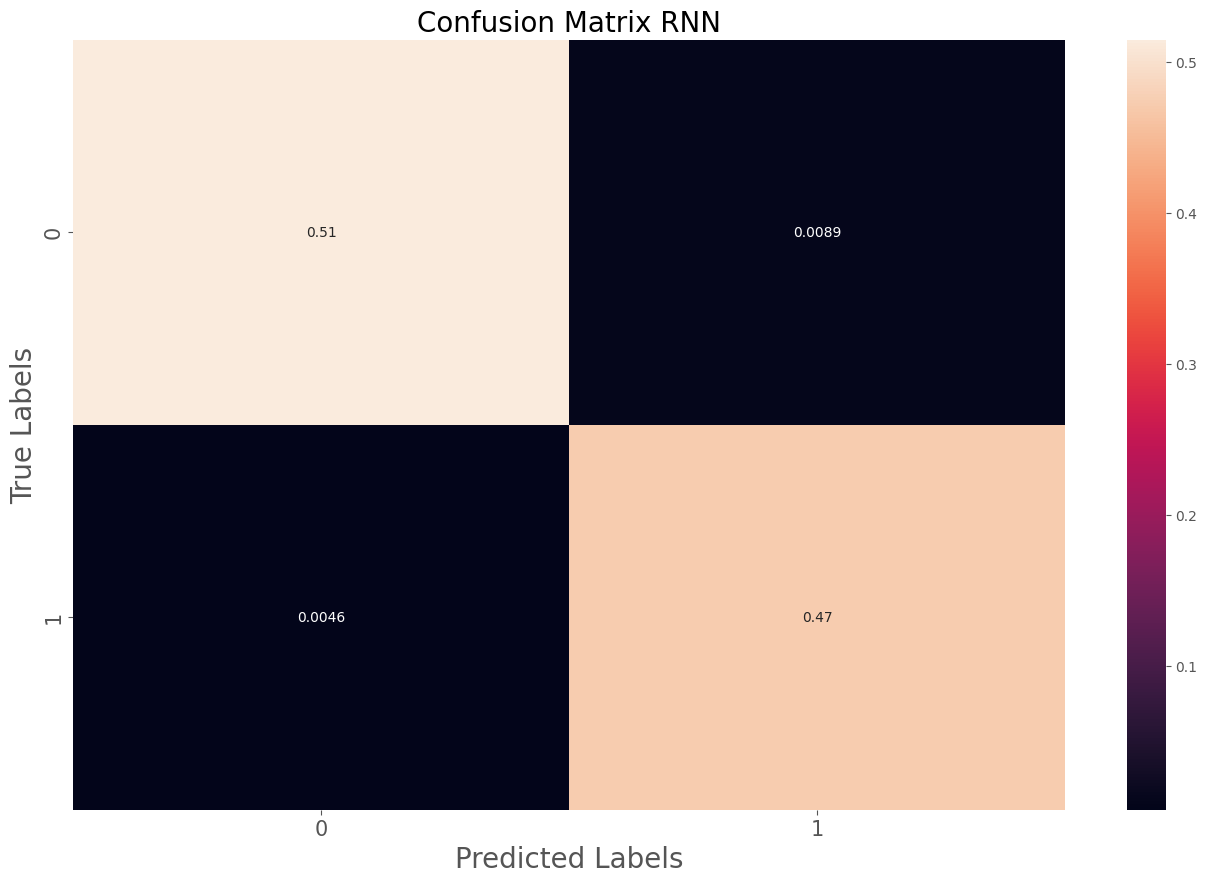

In [52]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix RNN', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# Building and Training of CNN Model

In [53]:
# Convolutional layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
#num_epochs = 10
#history_bi = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

model.save('cnn_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 252, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 178,689
Trainable params: 178,689
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1078/1078 [==============================] - 28s 25ms/step - loss: 0.4204 - accuracy: 0.8179 - val_loss: 0.1551 - val_accuracy: 0.9513
Epoch 2/10
1078/1078 [==============================] - 29s 27ms/step - loss: 0.1217 - accuracy: 0.9635 - val_loss: 0.0931 - val_accuracy: 0.9710
Epoch 3/10
1078/1078 [==============================] - 28s 26ms/step - loss: 0.0768 - accuracy: 0.9779 - val_loss: 0.0709 - val_accuracy: 0.9758
Epoch 4/10
1078/1078 [==============================] - 28s 26ms/step - loss: 0.0542 - accuracy: 0.9847 - val_loss: 0.0598 - val_accuracy: 0.9791
Epoch 5/10
1078/1078 [==============================] - 28s 26ms/step - loss: 0.0394 - accuracy: 0.9896 - val_loss: 0.0529 - val_accuracy: 0.9822
Epoch 6/10
1078/1078 [==============================] - 28s 26ms/step - loss: 0.0289 - accuracy: 0.9926 - val_loss: 0.0508 - val_accuracy: 0.9827
Epoch 7/10
1078/1078 [==============================] - 28s 26ms/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.0459 - val_accura

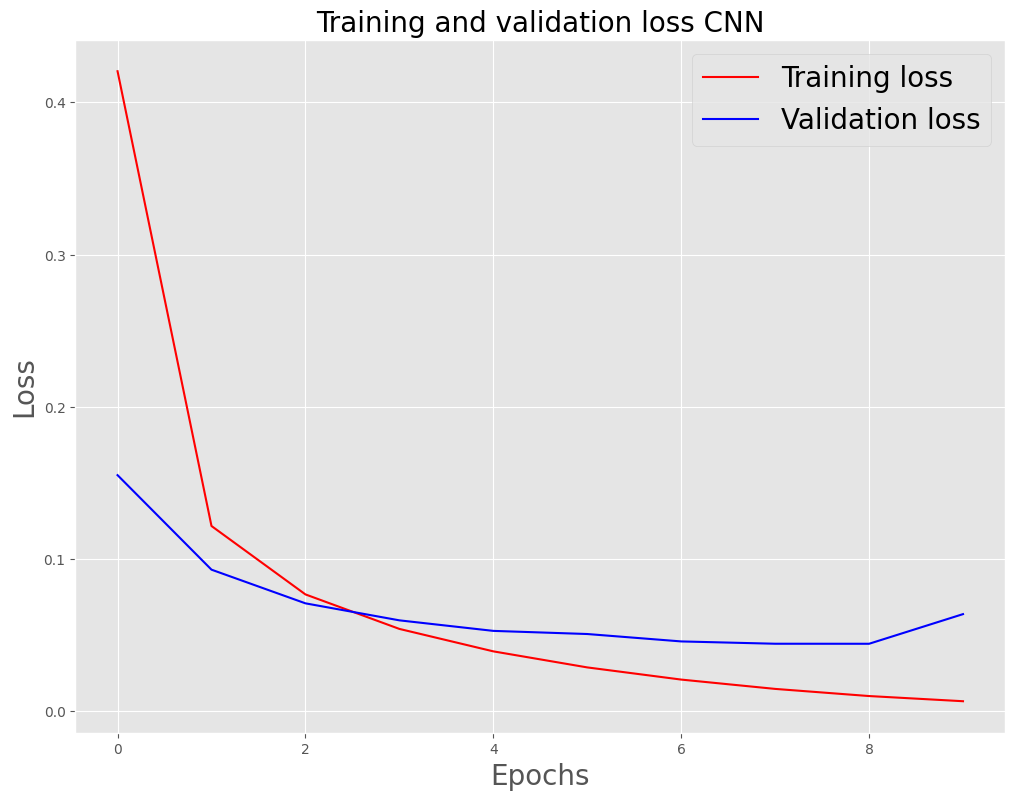

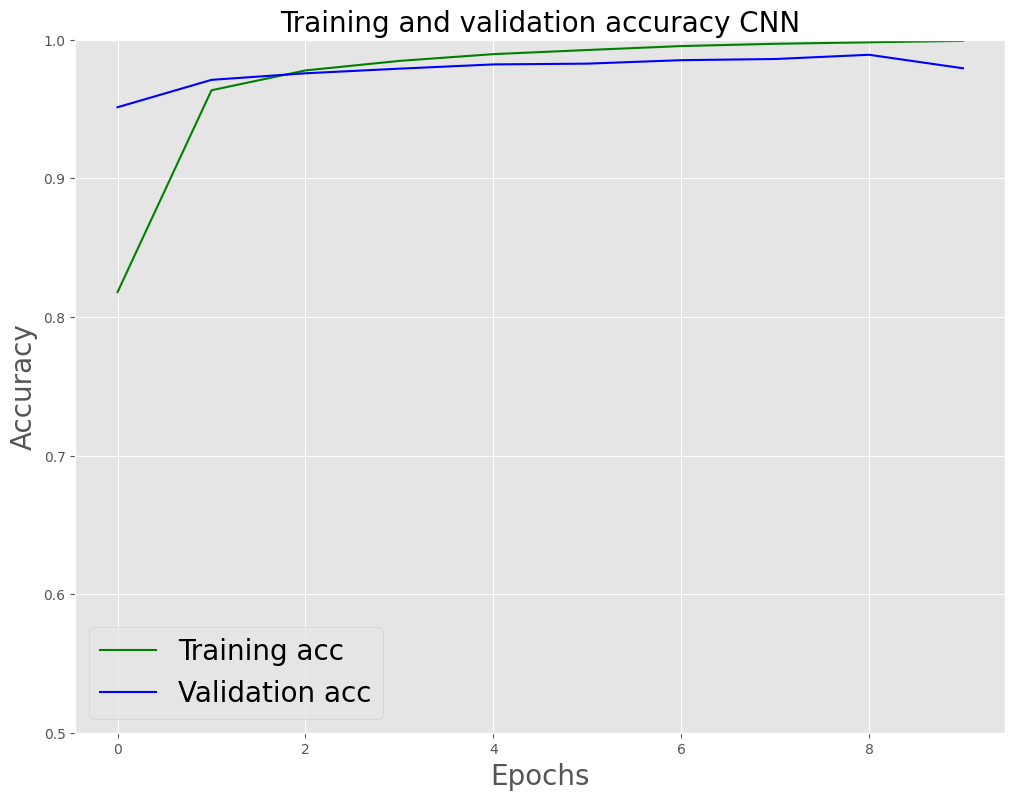

In [54]:
history_dict = history.history

cnn_acc = history_dict['accuracy']
cnn_val_acc = history_dict['val_accuracy']
cnn_loss = history_dict['loss']
cnn_val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, cnn_loss, 'r', label='Training loss')
plt.plot(epochs, cnn_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss CNN', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, cnn_acc, 'g', label='Training acc')
plt.plot(epochs, cnn_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy CNN', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [55]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 3s 10ms/step - loss: 0.0787 - accuracy: 0.9786


[0.07873233407735825, 0.9786191582679749]

In [56]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

281/281 [==============================] - 2s 7ms/step


In [57]:
acc_cnn = accuracy_score(binary_predictions, y_test)
pre_cnn = precision_score(binary_predictions, y_test)
rec_cnn = recall_score(binary_predictions, y_test)

print('Accuracy on testing set:', acc_cnn )
print('Precision on testing set:',pre_cnn )
print('Recall on testing set:',rec_cnn )

Accuracy on testing set: 0.978619153674833
Precision on testing set: 0.9634089856415007
Recall on testing set: 0.9918931807343825


In [58]:
cnn_model_eva = [ acc_cnn, pre_cnn, rec_cnn ]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

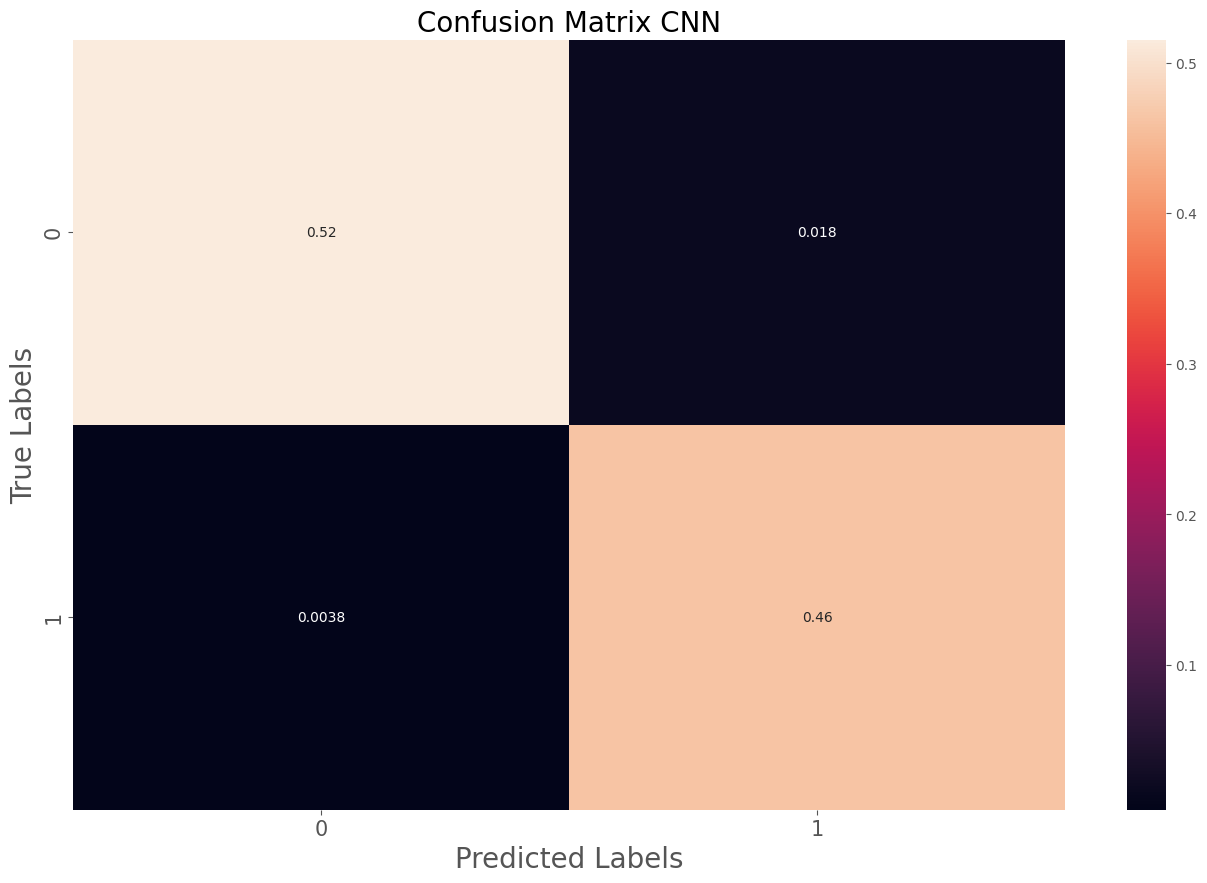

In [60]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix CNN', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# Building and Training of GRU Model

In [61]:
# Using Gated Recurrent Unit
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])
#num_epochs = 10
#history_bi = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

model.save('gru_model.h5')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              31488     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 192,269
Trainable params: 192,269
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1078/1078 [==============================] - 318s 289ms/step - loss: 0.4838 - accuracy: 0.7591 - val_loss: 0.2993 - val_accuracy: 0.8218
Epoch 2/10
1078/1078 [==============================] - 303s 281ms/step - loss: 0.2562 - accuracy: 0.9106 - val_loss: 0.1899 - val_accuracy: 0.9591
Epoch 3/10
1078/1078 [==============================] - 303s 281ms/step - loss: 0.1418 - accuracy: 0.9644 - val_loss: 0.1182 - val_accuracy: 0.9660
Epoch 4/10
1078/1078 [==============================] - 307s 285ms/step - loss: 0.1059 - accuracy: 0.9700 - val_loss: 0.0869 - val_accuracy: 0.9758
Epoch 5/10
1078/1078 [==============================] - 309s 286ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.0725 - val_accuracy: 0.9794
Epoch 6/10
1078/1078 [==============================] - 305s 283ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 7/10
1078/1078 [==============================] - 306s 284ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.047

[0.03748699277639389, 0.9897550344467163]

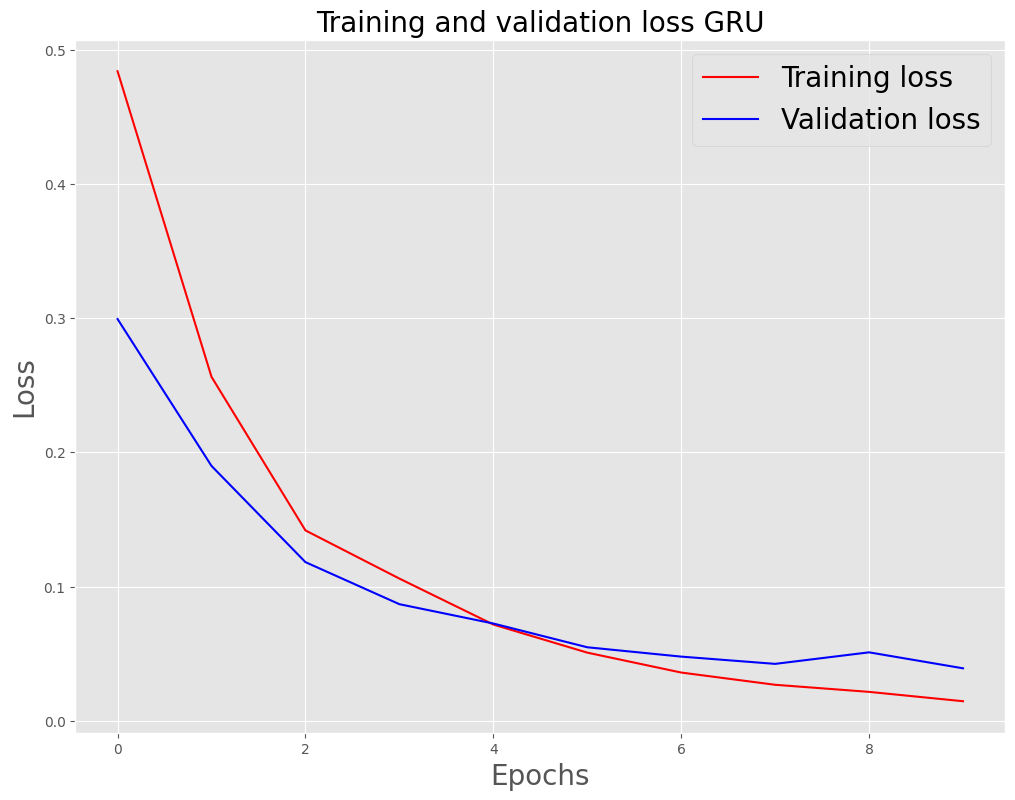

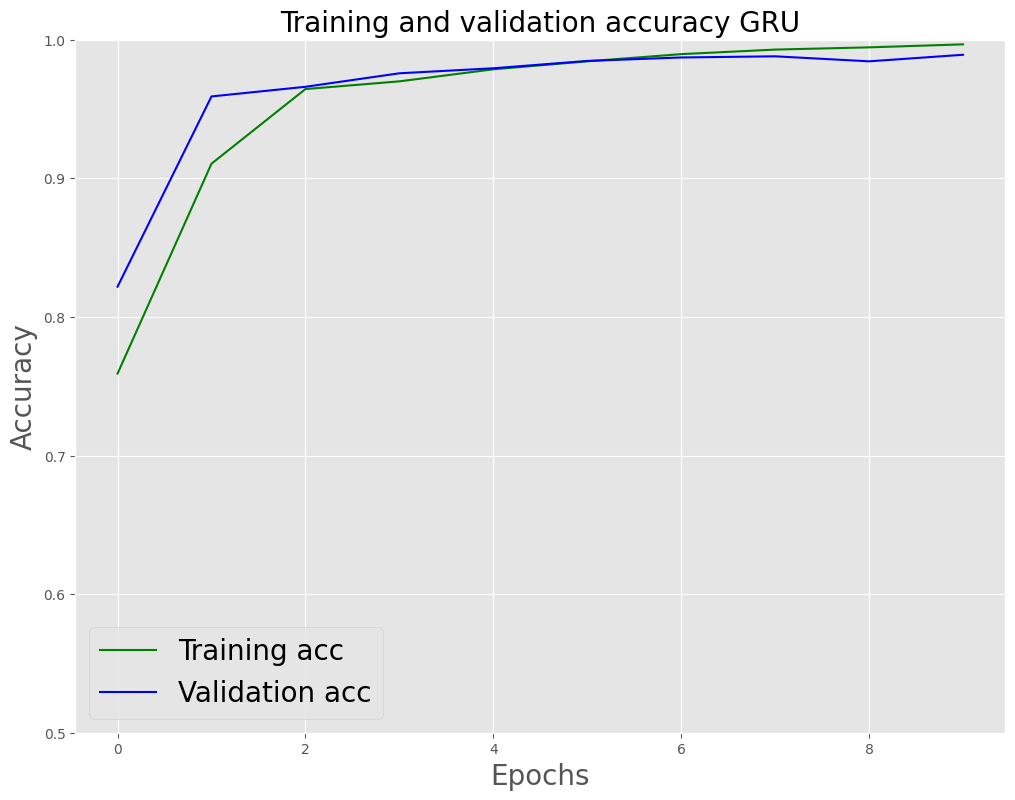

In [62]:
history_dict = history.history

gru_acc = history_dict['accuracy']
gru_val_acc = history_dict['val_accuracy']
gru_loss = history_dict['loss']
gru_val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, gru_loss, 'r', label='Training loss')
plt.plot(epochs, gru_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss GRU', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, gru_acc, 'g', label='Training acc')
plt.plot(epochs, gru_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy GRU', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [63]:
model.evaluate(X_test, y_test)


281/281 [==============================] - 16s 58ms/step - loss: 0.0375 - accuracy: 0.9898


[0.03748699277639389, 0.9897550344467163]

In [64]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

281/281 [==============================] - 17s 58ms/step


In [65]:
acc_gru = accuracy_score(binary_predictions, y_test)
pre_gru = precision_score(binary_predictions, y_test)
rec_gru = recall_score(binary_predictions, y_test)

print('Accuracy on testing set:', acc_gru )
print('Precision on testing set:',pre_gru )
print('Recall on testing set:',rec_gru )

Accuracy on testing set: 0.9897550111358575
Precision on testing set: 0.9867994441871236
Recall on testing set: 0.991852886405959


In [66]:
gru_model_eva = [ acc_gru, pre_gru, rec_gru ]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

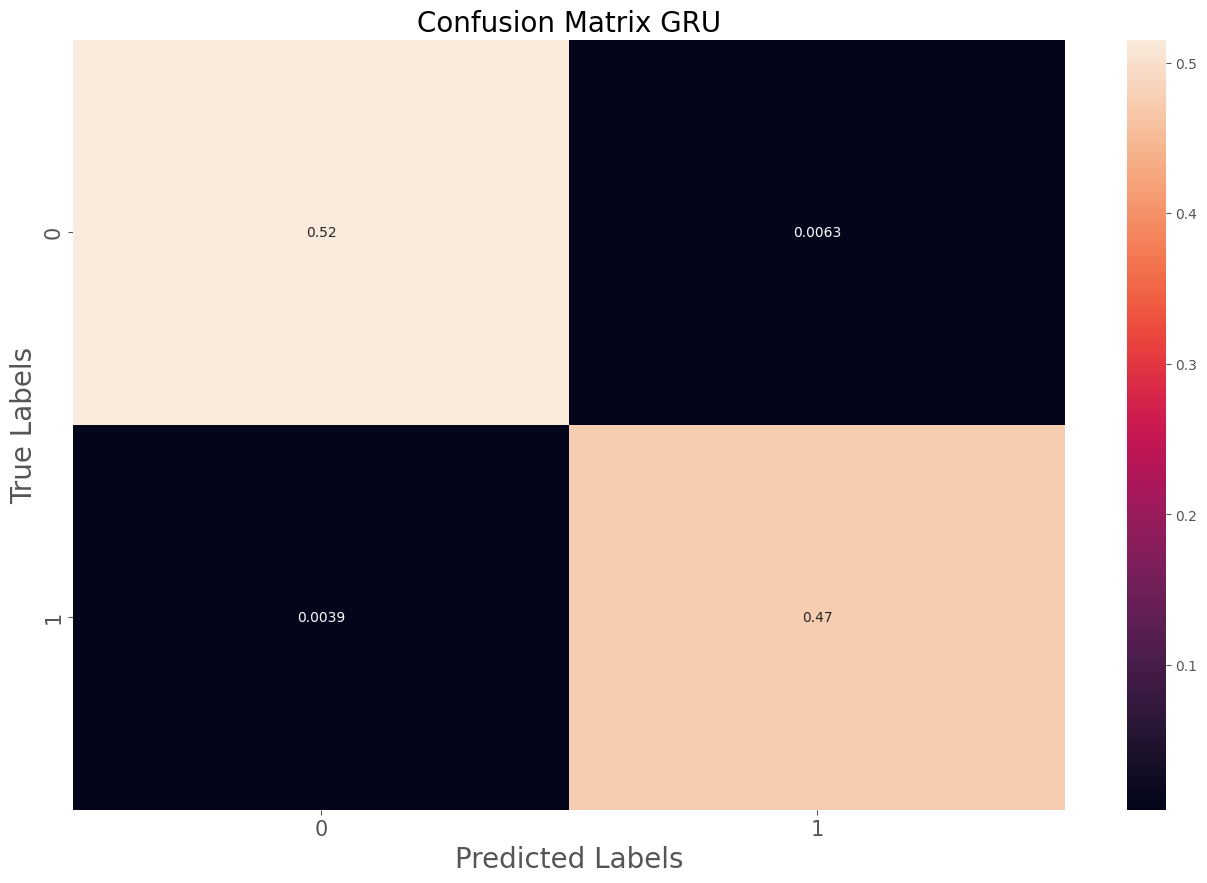

In [67]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix GRU', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# Comparison of the Four Models

In [74]:
eva_p = ("Accuracy", "Precision", "Recall")
df1  = list (zip(lstm_model_eva, rnn_model_eva, cnn_model_eva, gru_model_eva, eva_p))
df2 = pd.DataFrame(df1, columns= ['lstm_model', 'rnn_model', 'cnn_model', 'gru_model', 'evaluation'])
df2.set_index("evaluation", inplace=True)
df2

,lstm_model,rnn_model,cnn_model,gru_model
evaluation,,,,
Accuracy,0.988864,0.986526,0.978619,0.989755
Precision,0.991894,0.981473,0.963409,0.986799
Recall,0.985051,0.990418,0.991893,0.991853


In [75]:
mole = ('lstm_model','rnn_model', 'cnn_model', 'gru_model', 'evaluation')
acc_model = (acc_lstm, acc_rnn, acc_cnn, acc_gru)
df3 = list(zip(acc_model, mole))

acm_df = pd.DataFrame(df3, columns= ['Accuracy', 'evaluation'])
acm_df.set_index("evaluation", inplace=True)
acm_df

,Accuracy
evaluation,
lstm_model,0.988864
rnn_model,0.986526
cnn_model,0.978619
gru_model,0.989755


<Figure size 5400x5400 with 0 Axes>

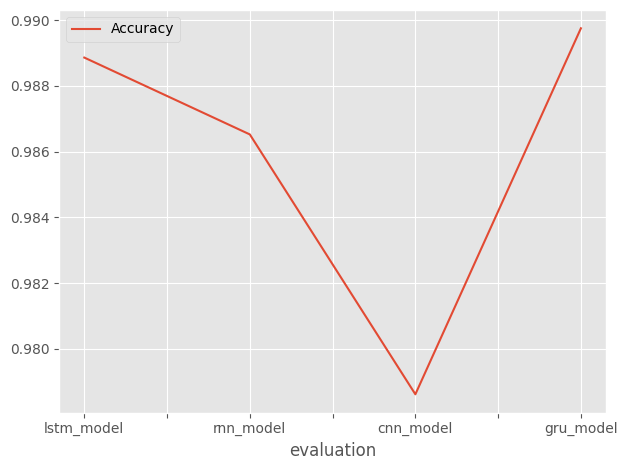

In [76]:
acm_df = pd.DataFrame(df3, columns= ['Accuracy', 'evaluation'])

acm_df.set_index("evaluation", inplace=True)
acm_df
fig = plt.figure(figsize=(54,54))
acm_df.plot()
plt.tight_layout()
